<a href="https://colab.research.google.com/github/mbaliu-treino/Desenvolve/blob/main/LEARN_C_ML_Human_based_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=orange><b>Aprendizado Humano: Aprendizado baseado em Regras </b></font>

<a href="https://colab.research.google.com/drive/1pQf4N7xNY3MC3b6JhpTG_Ek9qWZ7XQPa?authuser=1#scrollTo=JSeHxPLGhvUz"><font size=2; color=gray>Arquivo Colab</a></font>



MATERIAL BIBLIOGRÁFICO:

* [Human-Learn: Rule-Based Learning as an Alternative to Machine Learning](https://towardsdatascience.com/human-learn-rule-based-learning-as-an-alternative-to-machine-learning-baf1899ecb3a)
* [Vídeo](https://www.youtube.com/watch?v=JF-bC6JYJsw)
* [Creating a Human Learning Model by Drawing](https://towardsdatascience.com/human-learn-create-rules-by-drawing-on-the-dataset-bcbca229f00)

## <font color=orange><b>Conteúdo</b></font>


* <font color=orange><b>CONCEITOS</b></font>

    * Modelo de Aprendizado baseado em regras (rule-based Human Learning)
    * Modelo de Aprendizado de Máquinas
    * Comparação de modelos
    * Combinação de modelos

## <font color=orange><b>Metodologia</b></font>

<font color=orange><b></b></font>
1. <font color=orange><b>Definição de baseline</b></font>
    * Dummy classifier
    * Modelo simples ML de classificação
2. <font color=orange><b>Modelo baseado em Regra</b></font>
    1. Hipótese
    2. Observação dos dados e avaliação da hipótese
        * Obtenção do valor limite (threshold)
    3. Regra simples
        * Construção da função de classificação
    4. Incrementação das regras
        * Novas regras
        * Exploração do melhor threshold
3. <font color=orange><b>Combinação de modelos</b></font>
    * Redução dos falsos 


# <font color=orange><b>CONCEITOS</b></font>


Na aprendizagem supervisionada, tem-se um conjunto de dados rotulados e busca-se identificar um padrão neles para que seja aplicado em um outro conjunto de dados de forma a obter uma predição de uma variável. Para resolver este problemas diversos tipos de modelos podem ser desenvolvidos.


<font color=orange></font>
Os <font color=orange>modelos de Aprendizagem de Máquina (Machine Learning model)</font> são estratégias de identificar os padrões dos dados a partir de algorítmos que utilizam a estatística como estratégia de generalização. Por isso é comum serem chamados de modelos de aprendizagem estatística.



Uma desvantagem dos modelos de ML é a dificuldade de entender o que influenciou na decisão para a especificação da predição. Outra desvantagem é a dificuldade de incorporar os conhecimentos do negócio no modelo.

Uma outra opção são os modelos de <font color=orange>aprendizado baseado em regras humanas (*rule-based learning*)</font> que permitem incorporar os conhecimentos do negócio (conhecimentos sobre o domínio, *domain knowledge* na identificação dos padrões. Neste caso, é o conhecimento humano que criará regras para definição do que é mais importante ou não.

São 4 etapas para criação de dados rotulados por regras:

1. Geração de Hipóteses
2. Observação dos dados para validação das hipóteses
3. Início de criação de regras simples baseadas nas observações
4. Aprimoramento das regras

Algumas desvantagens do RL é:
* a dificuldade de generalizar dados não vistos
* a dificuldade de propor regras para dados complexos
* não possui a possibilidade de feedback loop para incrementar o modelo (gradiente descendente)

# * <font color=orange><b>PROBLEMA</b></font>

Em um caso de classificação, o modelo de ML buscará regras para a rotulação dos novos dados.

O exercício proposto a seguir é uma comparação de um modelo de ML com um modelo de regra humanas. Isso permitirá avalair a performance da predição de ambos modelos.

No caso será usado os dados de Detecção da Ocupação do UCI Machine Learning. O **objetivo** é predizer a ocupação de um quarto baseado na temepratura, umidade, luminosidade e CO². O quarto não está ocupado quando `Occupancy=0` e ocupado quando `Occupancy=1`.

In [49]:
uri_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip'
!wget $uri_data
!unzip "/content/occupancy_data.zip"

--2023-01-03 22:55:52--  https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 335713 (328K) [application/x-httpd-php]
Saving to: ‘occupancy_data.zip.1’

occupancy_data.zip. 100%[===================>] 327.84K  1.24MB/s    in 0.3s    

2023-01-03 22:55:52 (1.24 MB/s) - ‘occupancy_data.zip.1’ saved [335713/335713]

Archive:  /content/occupancy_data.zip
replace datatest.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [50]:
import pandas as pd

# Get train and test data
train = pd.read_csv("datatraining.txt").drop(columns="date")
test = pd.read_csv("datatest.txt").drop(columns="date")
test.sample(5)

Temperature  Humidity       Light     CO2  HumidityRatio  Occupancy
1990       21.100     26.50    0.000000   649.5       0.004098          0
1822       22.390     30.05    0.000000  1172.5       0.005036          0
172        23.600     27.60  488.333333   983.0       0.004977          1
1553       23.218     25.70  616.600000   882.4       0.004525          1
2280       20.700     25.10    0.000000   509.0       0.003786          0

In [51]:
train.shape

(8143, 6)

In [52]:
# Get X and y
target = "Occupancy"
train_X = train.drop(columns=target)
train_y = train[target]

val_X, val_y = test.drop(columns=target), test[target]

## <font color=orange><b>Modelo Random Forest Classifier</b></font>

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train
forest_model = RandomForestClassifier(random_state=1)

# Predict
forest_model.fit(train_X, train_y)
machine_preds = forest_model.predict(val_X)

# Evaluate
print(classification_report(val_y, machine_preds))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1693
           1       0.95      0.92      0.93       972

    accuracy                           0.95      2665
   macro avg       0.95      0.95      0.95      2665
weighted avg       0.95      0.95      0.95      2665



O resultado é bem satisfatório. No entanto, não sabemos o que levou o modelo a obter estes resultados. 

## <font color=orange><b>Modelo baseado em Regras Humanas</b></font>

### <font color=orange><b>1. Hipótese</b></font>

A luminosidade do quarto é um bom indicador se o quarto está ou não ocupado. Então podemos pressumir que quanto mais claro o ambiente, maior a chance dele estar ocupado

### <font color=orange><b>2. Observação dos dados</b></font>

Devemos verificar se a hipótese é verdadeira observando os dados.

Como estratégia de avaliação da hipótese pode-se usar o `boxplot` para avaliar a diferença entre a quantidade de luz para o quarto ocupado ou vazio.

In [54]:
import plotly.express as px
import plotly.graph_objects as go

feature = 'Light'
px.box(data_frame=train, x=target, y=feature)

Observa-se uma grande diferença entre as medianas dos quarto vazio `Occupancy=0` e do ocupado `Occupancy=1`.

### <font color=orange><b>3. Regra simples</b></font>

Agora deve-se criar regras para quando o quarto estiver vazio e para quando ele estiver ocupado. 

Tecnicamente, se a quantidade de luminosidade estiver acima de um limite, o quarto será classificado como ocupado.

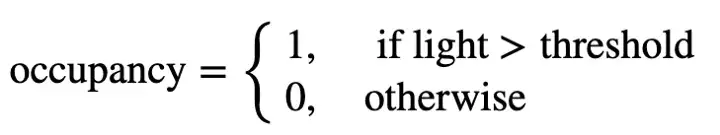

Mas o primeiro desafio surge com a necessidade de definir o valor do limite de referência (*threshold*). Então pode-se escolher um valor observando os dados e identificando um número para servir de referência.

In [55]:
def plot_threshold(train_df: pd.DataFrame, feature: str, target: str, threshold: float):
    fig = px.box(data_frame=train_df, x=target, y=feature)

    # add a second axis that overlays the existing one
    fig.layout.xaxis2 = go.layout.XAxis(
        overlaying="x", range=[0, 2], showticklabels=False
    )
    fig.add_scatter(
        x=[0, 2],
        y=[threshold, threshold],
        mode="lines",
        xaxis="x2",
        showlegend=False,
        line=dict(dash="dash", color="firebrick", width=2),
    )

    fig.show()

In [56]:
threshold = 100
plot_threshold(train, feature, target, threshold)

#### <font color=orange>Human-Learn</font>

Para criar o modelo baseado em regras será:

* Criada função em Python que especifica a regra
* Usar o `human-learn` para transformar a função em um modelo scikit-learn.
* Os parâmetros da função poderá ser usado referência para a hiperparamertrização em Grid-Search

A biblioteca [human-learn](https://koaning.github.io/human-learn/index.html) cria um sistema baseado em regras, incorporando o conhecimento do negócio, de forma integrada com o `scikit-learn`.

In [57]:
!pip install human-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
import numpy as np
from hulearn.classification import FunctionClassifier

def create_rule(data: pd.DataFrame, col: str, threshold: float=100):
    valuater = data[col] > threshold
    valuater_np = np.array(valuater)
    valuater_binary = valuater_np.astype(int)
    return valuater_binary
    # return np.array(data[col] > threshold).astype(int)


mod = FunctionClassifier(create_rule, col='Light')

In [59]:
# Rule-based model (Light=100)
threshold = 100
mod = FunctionClassifier(create_rule, col=feature, threshold=threshold)

mod.fit(train_X, train_y)
preds = mod.predict(val_X)
print(classification_report(val_y, preds))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1693
           1       0.93      1.00      0.96       972

    accuracy                           0.97      2665
   macro avg       0.96      0.98      0.97      2665
weighted avg       0.97      0.97      0.97      2665



A acurácia do modelo baseado em regra é melhor do que o modelo de Random Forest

### <font color=orange><b>4. Incrementar as regras</b></font>

Agora deve-se buscar melhorar o modelo especificando melhor as regras. Ou criando novas regras ou encontrando um valor mais preciso para o limite (*threshold*).

**Análise interativa**

As coordenadas paralelas permite analisar a relação entre um valor específico de luminância e a ocupação do quarto.

In [60]:
from hulearn.experimental.interactive import parallel_coordinates

parallel_coordinates(train, label=target, height=400)

From the parallel coordinates, we can see that the room with a light above 250 Lux has a high chance of being occupied. The optimal threshold that separates an occupied room from an empty room seems to be somewhere between 250 Lux and 750 Lux.

Let’s find the best threshold in this range using scikit-learn’s GridSearch.

In [61]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(mod, cv=2, param_grid={"threshold": np.linspace(250, 750, 1000)})
grid.fit(train_X, train_y)

GridSearchCV(cv=2,
             estimator=FunctionClassifier(col='Light',
                                          func=<function create_rule at 0x7fe0443b71f0>,
                                          threshold=100),
             param_grid={'threshold': array([250.        , 250.5005005 , 251.001001  , 251.5015015 ,
       252.002002  , 252.5025025 , 253.003003  , 253.5035035 ,
       254.004004  , 254.5045045 , 255.00500501, 255.50550551,
       256.00600601, 256.50650651, 257.00700701, 257.50750751,
       258.00800801, 25...
       734.48448448, 734.98498498, 735.48548549, 735.98598599,
       736.48648649, 736.98698699, 737.48748749, 737.98798799,
       738.48848849, 738.98898899, 739.48948949, 739.98998999,
       740.49049049, 740.99099099, 741.49149149, 741.99199199,
       742.49249249, 742.99299299, 743.49349349, 743.99399399,
       744.49449449, 744.99499499, 745.4954955 , 745.995996  ,
       746.4964965 , 746.996997  , 747.4974975 , 747.997998  ,
       748.4984985 , 

In [62]:
best_threshold = grid.best_params_["threshold"]
best_threshold

364.61461461461465

In [63]:
plot_threshold(train, feature, target, best_threshold)

In [64]:
human_preds = grid.predict(val_X)
print(classification_report(val_y, human_preds))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



## <font color=orange><b>Comparação</b></font>

Desta forma podemos comparar os resultados de cada modelo. O modelo baseado por uma regra simples, com um limite (threshold) de 365 foi o que teve melhor desempenho.


In [65]:
# COMPARATION
df = pd.DataFrame({
    'machine_preds': classification_report(val_y, machine_preds, output_dict=True)['macro avg'],
    'human_preds_100': classification_report(val_y, preds, output_dict=True)['macro avg'],
    'human_preds_grid': classification_report(val_y, human_preds, output_dict=True)['macro avg'],
    })
df.drop('support').round(2)

machine_preds  human_preds_100  human_preds_grid
precision           0.95             0.96              0.97
recall              0.95             0.98              0.98
f1-score            0.95             0.97              0.98

# <font color=orange><b>Combinação de modelos</b></font>



A combinação de modelos de ML e de baseados em regras pode auxiliar os projetos de Data Sciency em incorporar a capacidade de escolonamento pelo aprendizado baseado em estatística, ao mesmo tempo que é incorporado a experiência consolidada sobre a temática.

Para realizar esta combinação, uma estratégia é decidir se deverá reduzir os <font color=orange>falsos negativos</font> ou os <font color=orange>falsos positivos</font>.

Ambos os modelos possuem registro que coincidem entre si, tanto como positivo (`var = 1`) ou como negativo (`var = 0`). No entanto, há registros em os modelos podem divergir entre si. E nesses casos é possível adotar uma estratégia política de lidar com esta divergência. Ela irá depender justamente do impacto do erro, buscando reduzir os registros falsos que mais danosos.

Outros políticas de decisão sobre qual predição escolher poderão ser usadas.

In [75]:
# Função de highlight {NEGATIVE: red  POSITIVE: green}
def highlight_cell(row):
    result = []
    for cell in row:
        if cell == 0:
            result.append("background-color: red; color: white")
        else:
            result.append("background-color: green; color: white")

    return [
        "background-color: red; color: white"
        if cell == 0
        else "background-color: green; color: white"
        for cell in row
    ]

In [70]:
# Tabela de comparação
comparisons = pd.DataFrame({
    "RandomForestClassifier": machine_preds,
    "Rule-based Model": human_preds,
    #"Real Label": val_y.values,
    })

difference_selector = comparisons["RandomForestClassifier"] != comparisons["Rule-based Model"]
difference = comparisons[difference_selector]

difference.head(10)

RandomForestClassifier  Rule-based Model
0                          0                 1
1                          0                 1
2                          0                 1
5                          0                 1
6                          0                 1
225                        1                 0
1038                       0                 1
1039                       0                 1
1040                       0                 1
1339                       0                 1

## <font color=orange><b>Reduzir Falsos Negativos</b></font>

Os falso negativos (<font color=orange>erros do tipo II</font>) podem ser reduzidos quando o impacto de não identificar o efeito poderá trazer mais prejuízo. Por exemplo, em cenários de predição se um paciente possui cancêr, é melhor indicar erroneamente que ele possui a doença, orientando-o para exames mais detalhados, do que deixar ele voltar para casa com a falsa sensação de segurança.

Neste caso, para reduzir o falso negativo, deve-se classificar positivamente caso qualquer modelo indique a possibilidade. Assim, se os modelos discordarem, estaremos adotando a política mais positiva e aceitar qualquer um que de positivo.



<font color=orange>$$\text{Prediction}_{comb} = \text{Prediction}_A \lor \text{Prediction}_B$$</font>

In [76]:
reduce_false_negatives = difference.assign(final_prediction=1)

reduce_false_negatives.style.apply(highlight_cell)

## <font color=orange><b>Reduzir Falsos Positivos</b></font>

O <font color=orange>Erro tipo I</font>, de falso positivo, deverá ser evitado quando a indicação equivocada da ocorrência do fenêmeno poderá trazer mais danos do que a não tratar o efeito.

Em cenários como a  recomendação de vídeos que podem ser violentos às crianças, é preferível sobrestimar os filmes violentos, fazendo que menos filmes sejam mostrados a crianças, do que deixar passar filmes violentos para elas.

Para reduzir os falso positivos, em caso de divergência dos modelos, será adotado a classificação negativa. 

To reduce false positives, choose negative labels when two models disagree.

<font color=orange>$$\text{Prediction}_{comb} = \text{Prediction}_A \land \text{Prediction}_B$$</font>

In [77]:
reduce_false_positives = difference.assign(final_prediction=0)

reduce_false_positives.style.apply(highlight_cell)

In [83]:
# Combination Policy
cp_reduce_false_positive = comparisons['RandomForestClassifier'] & comparisons['Rule-based Model']
cp_reduce_false_negative = comparisons['RandomForestClassifier'] | comparisons['Rule-based Model']

In [84]:
# Redução de Falso Positivo
comparisons.assign(final_prediction=cp_reduce_false_positive).style.apply(highlight_cell)

In [85]:
# Redução de Falso Positivo
comparisons.assign(final_prediction=cp_reduce_false_negative).style.apply(highlight_cell)